### Objectives:
- To model the demand for shared bikes with the available independent variables.
- To make model interpretable how exactly the demands vary with different features.

### Steps:
- Data Reading and Understanding data
    - Read into Dataframe
    - Understand data
    - Visualize data
- Data Preparation
    - Encoding
        - Binary Encoding
        - Dummy Variables
    - Splitting
        - Train Test Split
    - Scalling
        - MinMax Scalling
- Taining Model
- Residual Analysis
- Prediction and Evaluation

### Step-1 : Reading and Understanding

In [1]:
# importing libraries and modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset into dataframe
df_bike = pd.read_csv(r"C:\Users\aakis\UPGRAD-ML AI\Assignments\Bike Sharing Assignment\DataSet\day.csv", sep=',')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_bike.shape

(730, 16)

There are no missing values present in the dataframe, but to re-verify 

In [5]:
print(round(df_bike.isnull().mean()*100),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64 2


In [6]:
# Let's look at the quartiles and means of numerical vars
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Clearly there were some categorical vars initailly in the dataset but they are already been converted into numerical, but before that let's drop instant variable as it is not required

Dropping Redundant variables 

In [7]:
# Dropping variable
df_bike = df_bike.drop(['instant', 'dteday', 'casual','registered'], axis=1)

In [8]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
# Counting the number of occurences of values to get some idea about dummy vars
df_bike['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [10]:
df_bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [11]:
df_bike['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

From examining Excel sheet we see some discrepancies in the `workingday` variable as there are some values which are not represented properly. but ignoring and proceeding 

In [12]:
# Filling weekday column again 
#df_bike['dteday'] = pd.to_datetime(df_bike['dteday'], format= '%d-%m-%Y')
#df_bike['weekday'] = df_bike['dteday'].dt.strftime('%a')
#df_bike['weekday'] = df_bike['weekday'].map({'Mon':})
#df_bike.head(2)

In [13]:
df_bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
cat_list = ['season', 'mnth', 'weekday', 'weathersit']

The above four variables are the categorical variables

In [15]:
# Converting variables in cat_list into categorical
for i in range(len(cat_list)):
    df_bike[''+cat_list[i]+''] = df_bike[''+cat_list[i]+''].astype('category')
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


Now since `casual` and `registered` are summed and we got `cnt` variable, similarly we can get difference in temperatures `temp_diff`

In [16]:
# Separating Numeric and Categorical vars 
numeric_vars = df_bike.select_dtypes(include = np.number)
categ_vars = df_bike.select_dtypes(exclude = [np.number, np.object])
print(numeric_vars.shape[1], categ_vars.shape[1])

# Actual numeric vars
num_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

8 4


### Visualizing Data

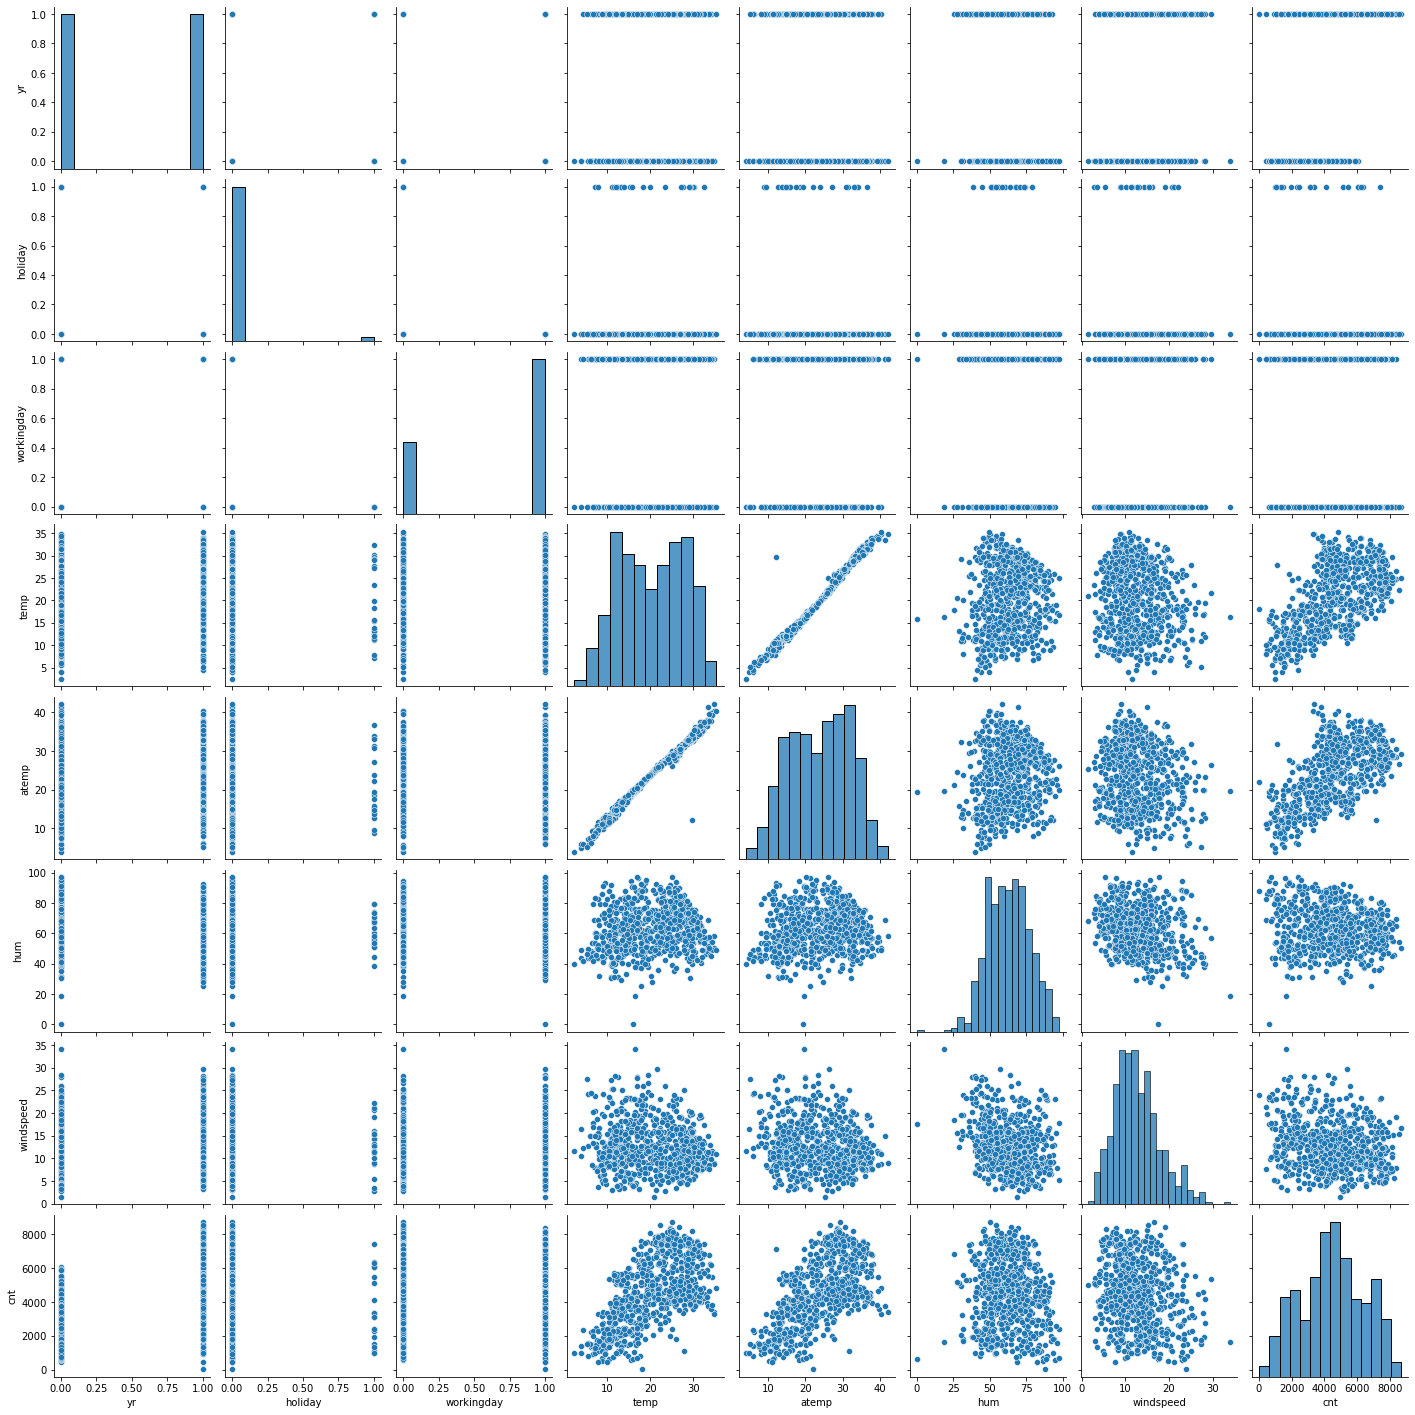

In [17]:
# plotting pair plot for numeric variables 
sb.pairplot(df_bike)
plt.show()

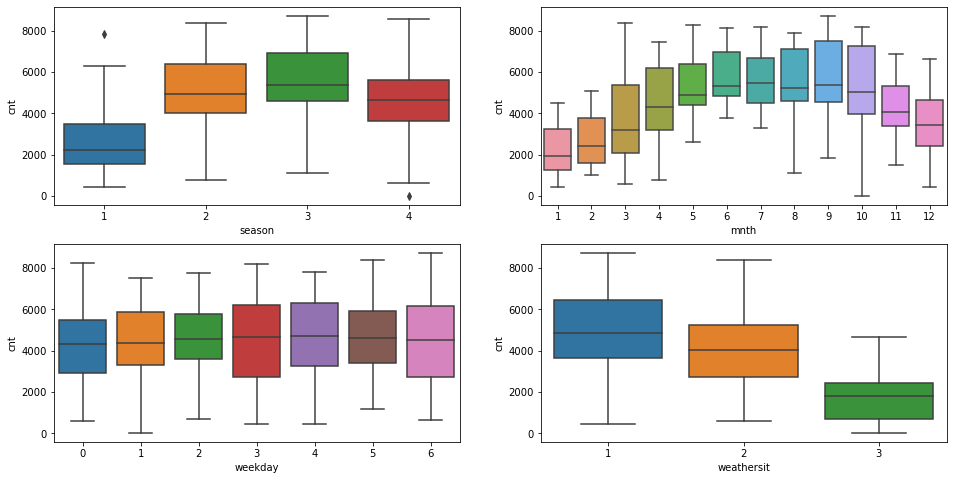

In [18]:
# Plot for Categorical vars
plt.figure(figsize=(16,8))
for i in range(categ_vars.shape[1]):
    plt.subplot(2,2,i+1)
    sb.boxplot(x= ''+categ_vars.columns[i]+'', y= 'cnt', data= df_bike)
plt.show()

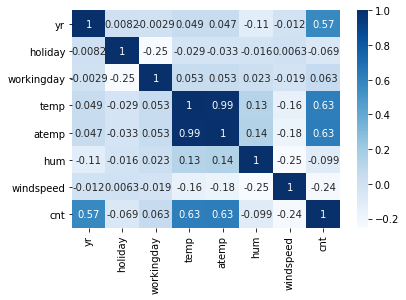

In [19]:
# Correlation matrix
sb.heatmap(df_bike.corr(), cmap= 'Blues', annot= True)
plt.show()

Variable `yr` and `temp_diff` shows good correlation with the target variable `cnt`

In [20]:
#bike = df_bike.copy()

## Step-2 : Data Preparation

*Encoding* - Dummy Variables 

We have now 4 categorical variables

In [21]:
bike_d = pd.get_dummies(df_bike, drop_first= True)
bike_d.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
bike_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [23]:
pd.set_option('display.max_columns',30)

#### *Splitting* data into Train-Test Sets

In [24]:
# Splitting dataframe into train-test set
df_train, df_test = train_test_split(bike_d, train_size=0.7, test_size=0.3, random_state=333)
print(df_train.shape,"\n", df_test.shape)

(510, 30) 
 (219, 30)


#### *Scalling* Features

In [25]:
# Instantiating object 
scaler = MinMaxScaler()

# Fit_transform numeric vars
df_train[num_list] = scaler.fit_transform(df_train[num_list])
df_train.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [26]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,0.241176,0.082353,0.078431,0.084314,0.092157,0.072549,0.078431,0.098039,0.082353,0.084314,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,0.428217,0.275172,0.269113,0.278131,0.289531,0.259649,0.269113,0.297660,0.275172,0.278131,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Getting X and y Train set

In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step-3 : Training Model

### Using RFE for automatic feature elimination

In [28]:
# Instantiating object
lr = LinearRegression()

# Fitting X y
lr.fit(X_train, y_train)

# Running RFE
rfe = RFE(lr, n_features_to_select= 15)

# Fitting 
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 8),
 ('mnth_6', False, 9),
 ('mnth_7', False, 15),
 ('mnth_8', False, 11),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 6),
 ('weathersit_3', True, 1)]

In [30]:
# Columns to consider
model_col = X_train.columns[rfe.support_]
model_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [31]:
# New datframe with above columns
X_train_rfe = X_train[model_col]

### Building Model with detailed statistics

#### Model 1

In [32]:
# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create model
model_1 = sm.OLS(y_train, X_train_sm)

# Fit the model
bike_model_1 = model_1.fit()

# Stats
print(bike_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.87e-177
Time:                        20:19:13   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

#### VIF

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIFs'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.95
3,temp,7.13
5,windspeed,4.18


Dropping `weekday_5` HIGH p-value and HIGH VIF

In [34]:
X_train_new = X_train_rfe.drop('weekday_4', axis=1)

#### Model 2

In [35]:
# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.87e-177
Time:                        20:19:13   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

#### VIF

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIFs'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
4,hum,10.95
2,workingday,7.44
3,temp,7.13
5,windspeed,4.18
11,weekday_3,2.18
9,weekday_1,2.17
12,weekday_5,2.15
10,weekday_2,2.11
0,yr,2.00
7,season_4,1.62


Dropping `weekday_3` HIGH p-value next to 1

In [37]:
X_train_3 = X_train_new.drop('weekday_5', axis=1)

#### Model 3

In [38]:
# Add a constant
X_train_sm = sm.add_constant(X_train_3)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.39e-178
Time:                        20:19:13   Log-Likelihood:                 484.66
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     496   BIC:                            -882.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.610   

#### VIF

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIFs'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
4,hum,10.95
3,temp,7.12
2,workingday,4.61
5,windspeed,4.18
0,yr,2.00
7,season_4,1.62
9,weekday_1,1.60
6,season_2,1.58
11,weekday_3,1.57
10,weekday_2,1.53


Dropping `weekday_4` HIGH p-value

In [40]:
X_train_4 = X_train_3.drop('weekday_3', axis=1)

#### Model 4

In [41]:
# Add a constant
X_train_sm = sm.add_constant(X_train_4)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.78e-180
Time:                        20:19:13   Log-Likelihood:                 484.65
No. Observations:                 510   AIC:                            -943.3
Df Residuals:                     497   BIC:                            -888.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.618   

#### VIF

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIFs'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
4,hum,10.93
3,temp,7.12
5,windspeed,4.17
2,workingday,3.74
0,yr,2.00
7,season_4,1.61
6,season_2,1.58
9,weekday_1,1.42
10,weekday_2,1.34
1,holiday,1.22


Dropping `holiday` HIGH p-value

In [43]:
X_train_5 = X_train_4.drop('holiday', axis=1)

#### Model 5

In [44]:
# Add a constant
X_train_sm = sm.add_constant(X_train_5)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.09e-181
Time:                        20:19:13   Log-Likelihood:                 484.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     498   BIC:                            -893.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2650      0.028      9.587   

#### VIF

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIFs'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
3,hum,10.92
2,temp,7.10
4,windspeed,4.16
1,workingday,3.44
0,yr,2.00
6,season_4,1.61
5,season_2,1.58
9,weekday_2,1.34
8,weekday_1,1.26
7,mnth_9,1.20


Dropping `weekday_2` HIGH p-value

In [46]:
X_train_6 = X_train_5.drop('weekday_2', axis=1)

#### Model 6

In [47]:
# Add a constant
X_train_sm = sm.add_constant(X_train_6)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.92e-182
Time:                        20:19:13   Log-Likelihood:                 483.76
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     499   BIC:                            -898.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2656      0.028      9.612   

#### VIF

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIFs'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
3,hum,10.91
2,temp,7.10
4,windspeed,4.16
1,workingday,3.09
0,yr,1.99
6,season_4,1.60
5,season_2,1.57
7,mnth_9,1.20
8,weekday_1,1.20
9,weathersit_3,1.08


Dropping `workingday` HIGH p-value

In [49]:
X_train_7 = X_train_6.drop('weekday_1', axis=1)

#### Model 7

In [50]:
# Add a constant
X_train_sm = sm.add_constant(X_train_7)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          6.40e-182
Time:                        20:19:13   Log-Likelihood:                 481.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     500   BIC:                            -900.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2659      0.028      9.585   

In [52]:
X_train_8 = X_train_7.drop('workingday', axis=1)

### Model 8

In [53]:
# Add a constant
X_train_sm = sm.add_constant(X_train_8)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     290.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.31e-183
Time:                        20:19:40   Log-Likelihood:                 480.37
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     501   BIC:                            -904.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2745      0.027     10.146   

#### VIF

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIFs'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
2,hum,10.11
1,temp,7.02
3,windspeed,4.09
0,yr,1.99
5,season_4,1.60
4,season_2,1.57
6,mnth_9,1.20
7,weathersit_3,1.07


Dropping `hum`

In [55]:
X_train_9 = X_train_8.drop('hum', axis=1)

#### Model 9

In [56]:
# Add a constant
X_train_sm = sm.add_constant(X_train_9)

# Create and fit model
model_2 = sm.OLS(y_train, X_train_sm).fit()

# Stats
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.21e-168
Time:                        20:19:54   Log-Likelihood:                 443.01
No. Observations:                 510   AIC:                            -870.0
Df Residuals:                     502   BIC:                            -836.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0890      0.019      4.807   

#### VIF

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIFs'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIFs'] = round(vif['VIFs'],2)
vif = vif.sort_values(by= 'VIFs', ascending= False)
vif

,Features,VIFs
1,temp,3.80
2,windspeed,3.34
0,yr,1.98
3,season_2,1.53
4,season_4,1.32
5,mnth_9,1.19
6,weathersit_3,1.05


### Final Model 

cnt = 0.089 * const + 0.232 * yr + 0.576 * temp - 0.145 * windspeed +0.07 * season_2 
        + 0.122 * season_4 + 0.086 * mnth_9 - 0.275 * weathersit_3

### Step -4 : Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_pred = model_2.predict(X_train_sm)

In [59]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   temp          510 non-null    float64
 3   windspeed     510 non-null    float64
 4   season_2      510 non-null    uint8  
 5   season_4      510 non-null    uint8  
 6   mnth_9        510 non-null    uint8  
 7   weathersit_3  510 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 21.9 KB


In [60]:
r2_score(y_train, y_train_pred)

0.7947415954448496

Text(0.5, 0, 'Errors')

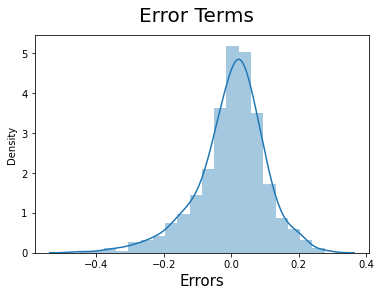

In [61]:
# residual calc
res = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)

### Hypothesis Testing:
Hypothesis testing states that:
H0: B1=B2=...=Bn=0 
H1: at least one  Bi!=0
 *Hence no coefficients are equal to 0* 

#### Distribution of Error terms is centered at 0 

## Step-5 : Prediction and Evaluation

In [62]:
# Scalling on test set 
df_test[num_list] = scaler.transform(df_test[num_list])

Separating test data

In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
X_test.shape

(219, 29)

In [65]:
# Keeping final model columns
X_test_new = X_test[X_train_9.columns]

# Adding Constant
X_test_sm = sm.add_constant(X_test_new)

In [66]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [67]:
# Predicting
y_test_pred = model_2.predict(X_test_sm)

### Evaluation

Text(0, 0.5, 'y_pred')

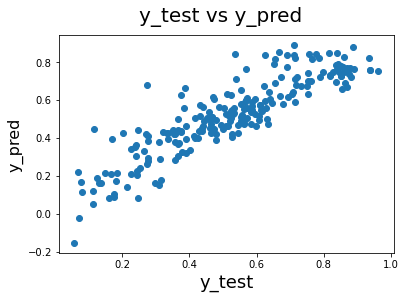

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### R2_SCORE 

In [69]:
r2_score(y_test, y_test_pred)

0.7790982771440178